In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, KMeans
from sklearn.neighbors import KNeighborsClassifier

In [3]:
def test():
    p_success = 0.8
    return np.random.random() > 1 - p_success

def generate_possibilities_2d(min, max, num_points):
    nx = np.linspace(min, max, num_points)
    ny = np.linspace(min, max, num_points)
    return np.meshgrid(nx, ny)

def get_random_coordinate(n_points: int, n_dimensions: int=2):
    x = np.random.randint(0, n_points)
    y = np.random.randint(0, n_points)

    return x, y

def get_next_coordinate():
    """
    ----
    Available hyperparameters:
    - Max clusters
    - Radius proportion
    - Chance of point inside radius
    """
    return np.random.random()

In [12]:
NUM_POINTS = 31 # Number of values tested for each parameter
INITIALISATION_SIZE = 100
EPOCH_SIZE = 50 # Number of points to test before reclassifying predictions

xv, yv = generate_possibilities_2d(-1, 1, NUM_POINTS)

# Build list of possible coordinates
remaining_coords = set()
for x in range(NUM_POINTS):
    coords= [(x, y) for y in np.arange(NUM_POINTS)]
    for coord in coords:
        remaining_coords.add(coord)


results = -1 * np.ones( (NUM_POINTS, NUM_POINTS) )
output = []

print("Initialising random points")
for i in range(INITIALISATION_SIZE):
    x, y = get_random_coordinate(NUM_POINTS)
    while results[x,y] != -1:
        x, y = get_random_coordinate(NUM_POINTS)
    coord = (x,y)

    results[coord] = test()
    remaining_coords.remove(coord)
    output.append([xv[coord], yv[coord], results[coord]])

print("Calculating KNN")
X = np.array(output)[:, 0:2]
y = np.array(output)[:, 2]

knn = KNeighborsClassifier()
knn.fit(X, y)

print("%d remaining coordinates" % len(remaining_coords))
X_test = np.array([list(x) for x in list(remaining_coords)])
y_pred = knn.predict(X_test)

print("Predicting remaining datapoints")




Initialising random points
Calculating KNN
861 remaining coordinates
Predicting remaining datapoints


{0.9578775699929865, 0.008259382994292297, 0.505900723747897, 0.24989725419618591, 0.924395441565169, 0.9479121815723506, 0.2971800446554502, 0.6560237508308762, 0.3772721638788108, 0.18767499504997964, 0.10725470247675917, 0.4292237160601222, 0.9778902886640428, 0.8914988651713078, 0.5869084283364044, 0.7837859339283006, 0.7650297123525227, 0.22988573712855565, 0.47737015999180765, 0.3105462457366961, 0.6722354736815362, 0.15190881547332058, 0.44129814174498794, 0.6590757550719966, 0.3286768786400148, 0.825159281645644, 0.33833470755296813, 0.08039691480403144, 0.4602957564432425, 0.9869539251134735, 0.2873889978114884, 0.6545697851855881, 0.9902864077686985, 0.3740933813319196, 0.5796224654862907, 0.5080829499940858, 0.21103478663262976, 0.449025381600605, 0.3644495161070286, 0.30411396500720667, 0.6985925454316365, 0.27421999845366607, 0.2989550198790696, 0.7575025876593594, 0.5217355637586388, 0.6039968147390371, 0.37764047263096834, 0.4436852540665227, 0.8232289356539763, 0.427957

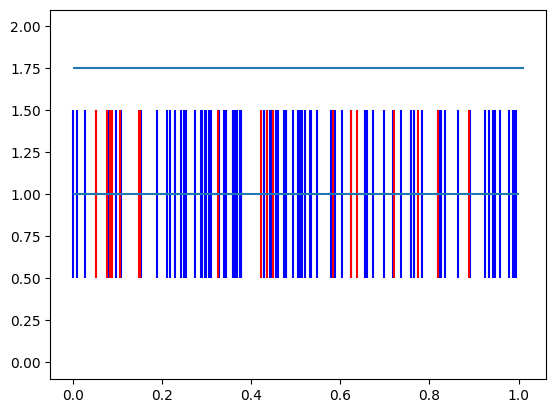

In [ ]:
success_coords = set()
fail_coords = set()

for i in range(100):
    coordinate = get_next_coordinate()
    is_success = test()

    if is_success:
        success_coords.add(coordinate)
    else:
        fail_coords.add(coordinate)
print(success_coords)
print(fail_coords)

success_arr = np.array(list(success_coords))
radius = np.abs((success_arr - success_arr.mean())).max()

fail_arr = np.array(list(fail_coords))

print("Mean:", success_arr.mean())
print("Radius:", radius)

plt.figure()
plt.eventplot(success_arr, orientation='horizontal', colors='b')
plt.eventplot(fail_arr, orientation='horizontal', colors='r')
# plt.eventplot([success_arr.mean(), success_arr.mean()-radius, success_arr.mean()+radius], orientation='horizontal', colors='r')

plt.hlines(1,0,1)
plt.hlines(1.75,success_arr.mean()-radius, success_arr.mean()+radius)

plt.show()